Ok let's convince ourselves (if you need convincing) that the Shannon-Nyquist theorem (SNT) is true; where I define the SNT the following way:

1. $\textit{Given time series data-points sampled at f_{sample}, you CANNOT DISTINGUISH whether these data-points describe a wave more than half of this sample frequency, $\frac{f_{sample}}{2}$}$

I really hate how this definition sounds, so let me say it in a better way:

2. $\textit{Want to reconstruct up to some frequency f? THEN SAMPLE AT 2f!}$


In [1]:
# You can't get far without these can you?
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is the wave we want to reconstruct
def wave(t, f):
    omega = 2*np.pi*f
    return np.cos(omega*t)
# Just a cosine wave, nice, no smoke, no mirrors.

In [3]:
# Ok, this function represents the time series data that our detector would spit out if it were
# sampling at f_sample

def samples_that_the_detector_spits_out(sample_freq, f):
    t_sampled = np.arange(start,end, 1/sample_freq)
    y_sampled = wave(t_sampled, f)
    return t_sampled, y_sampled

Nothing crazy so far.

But here is where it gets interesting.

If the SNT is true then I should not be able to distinguish whether the data-points described by the function above may be described by a wave that is higher than half of this sampling frequency.

Let me prove this.

Suppose the data-points produced by the detector above describe a wave below the sampling frequency:

$$\cos(2\pi(f_s/2-\delta)t)$$

Ok, let's look at the time-series data points that the detector would spit out:

Text(0, 0.5, 'Amplitude of Sample')

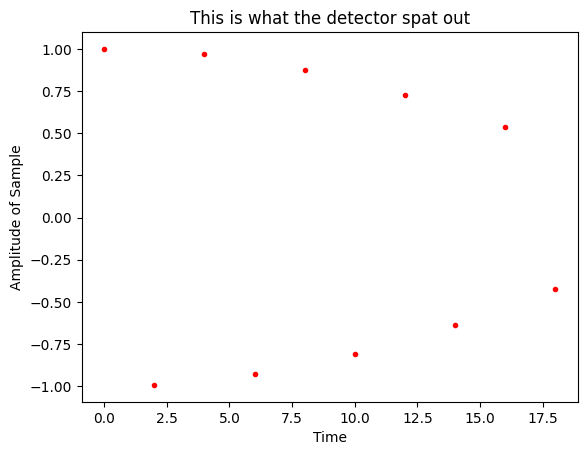

In [28]:
sample_freq = 0.5 # whatever, it can be anything, we are proving this generally
delta = 0.01
start, end = 0, 20
wave_freq = sample_freq/2 - delta

t_sam, y_sam = samples_that_the_detector_spits_out(sample_freq, wave_freq)

plt.plot(t_sam, y_sam, ".r")
plt.title("This is what the detector spat out")
plt.xlabel("Time")
plt.ylabel("Amplitude of Sample")

Let's verify that these red points really do describe the wave:

$$\cos(2\pi(f_s/2-\delta)t)$$

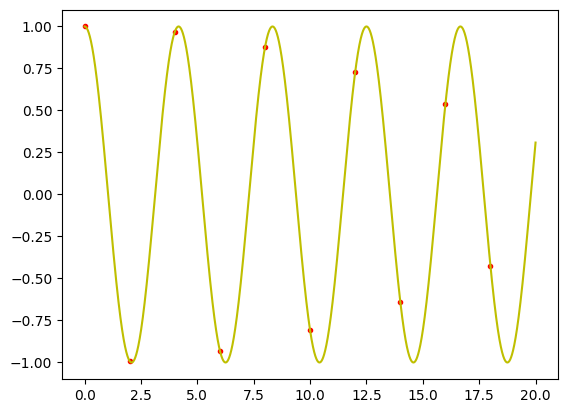

In [29]:
t = np.linspace(start, end,10000) # Trying to plot the wave as continuously as possible
plt.plot(t_sam, y_sam, ".r") # Data-Points from before
plt.plot(t, wave(t, wave_freq), "y") # The actual wave

Convinced? Me too. Ok now for the main kicker:

We claim that these red points $\textbf{ALSO}$ describe a wave above half the sampling frequency, namely:

$$\cos(2\pi(f_s/2+\delta)t)$$

WHAAAAT? Yeah, its true.

Let us show you. Under what conditions is the following statement true?

$$\cos(2\pi(f_s/2+\delta)t) = \cos(2\pi(f_s/2-\delta)t)$$

First, expand the $2\pi$, nothing illegal about that.

$$\cos(\pi f_s t+2\pi\delta t) = \cos(\pi f_s t-2\pi\delta t)$$

Now, use the followin trig identity: $\cos(a+b)=\cos(a)\cos(b)-\sin(a)\sin(b)$

So we get:

$$\cos(\pi f_s t)\cos(2\pi\delta t)-\sin(\pi f_s t)\sin(2\pi\delta t) = \cos(\pi f_s t)\cos(-2\pi\delta t))-\sin(\pi f_s t)\sin(-2\pi\delta t)$$

Since $\cos(x)$ is an even function, $\cos(-x)=\cos(x)$ and the first and third terms cancel as a consequence:

$$-\sin(\pi f_s t)\sin(2\pi\delta t) = -\sin(\pi f_s t)\sin(-2\pi\delta t)$$

$\sin(x)$ is an odd function and therefore we get:

$$\boxed{2\sin(\pi f_s t)\sin(2\pi\delta t) = 0}$$

And when is this true??

ANSWER: When $f_s t = n$ where n is any integer, which is just analagous to the condition that we sample the time series data-points at $f_s$

YAY! Proved.

But ok, that is all well and good, trig proofs look nice and fancy but we don't believe anything unless we really show it, so let's do that.

Do the red points describe $\cos(2\pi(f_s/2+\delta)t)$ AND $\cos(2\pi(f_s/2-\delta)t)$?

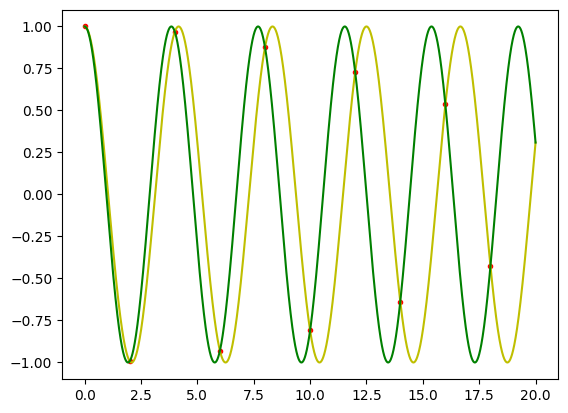

In [32]:
wave2_freq = sample_freq/2+delta # define the new wave frequency

plt.plot(t_sam, y_sam, ".r") # Data-Points from before
plt.plot(t, wave(t, wave_freq), "y") # The actual wave, we thought it was originally
plt.plot(t, wave(t, wave2_freq), "g") # The new wave that the trig proof claims should be described by red points

Zoom into any red point, they perfectly describe both the yellow and green waves.

SO WHAT HAVE WE SHOWN??

The SNT is actually true. You cannot $\textbf{uniquely}$ reconstruct a wave with data-points if you allow waves that are MORE THAN TWICE your sampling frequency. THEREFORE, you MUST sample at AT LEAST TWICE the frequency of the wave you are hoping to find/construct.

What are the real-life consequences of this?

Well, suppose your gravitational wave detector sampled at $f_s$ and gave you the red points.

Suppose as well that the GREEN gravitational wave travels to EARTH as your detector gave you those red points.

You then do the sensible thing and perform a discrete Fourier transform (DFT) on the red points.

You compute your power-spectral density plot.

You will end up with a very high peak at the frequency $f_s - \delta$ Because your DFT will tell you "oh yeah, there is a nice YELLOW curve there".

However, the power at $f_s - \delta$ will also come from the true GREEN wave at $f_s + \delta$. This is what is meant by FOLDING.

You will then walk away, write your paper, and tell the world there was a YELLOW GW wave. Your PSD will only reach $f_s$ and you will never know that in fact the GW was GREEN not YELLOW 